<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Development of Baseline Models (to compare with)</font>
* Course: <a href="https://www.gernotheisenberg.de/time_series_forecasting.html">Time Series Forecasting (TSF)</a>
* Lecturer: <a href="https://www.gernotheisenberg.de/uebermich.html">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/lehre.html">Gernot Heisenberg</a>
* Date:   25.02.2025

<img src="./images/baseline-374x300.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION OF THE NOTEBOOK CONTENT</font>:
This notebook show you how to develop four different baseline models to compare your real forecasts to. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. now do something
    * subtask 1
    * subtask 2
5. ...
-----------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
# get the data
df = pd.read_csv('./data/johnson_johnson_eps.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
# substract a year column for better viz
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


## Visualization of the raw data
The grayish area is the one to be forecasted

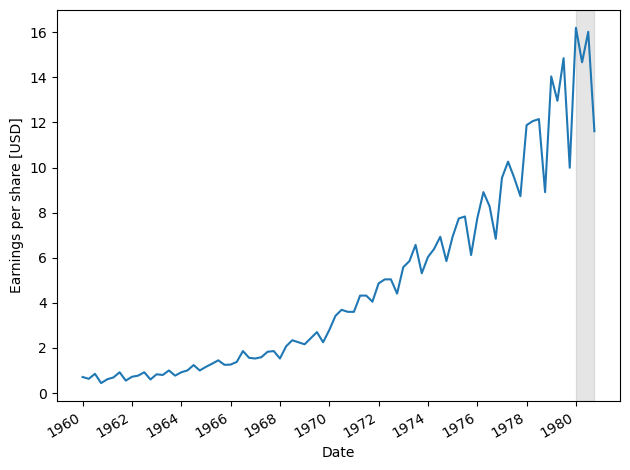

In [30]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share [USD]')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

### Plot data with train/test split
Since the data was sampled quarterly, split 4 quarters off for one year.

In [31]:
train = df[:-4]
test = df[-4:]

## 1. baseline model: 
### Predict historical mean  

In [7]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [8]:
test.loc[:, 'pred_mean'] = historical_mean

test

,date,data,year,pred_mean
80,1980-01-01,16.20,1980,4.3085
81,1980-04-01,14.67,1980,4.3085
82,1980-07-02,16.02,1980,4.3085
83,1980-10-01,11.61,1980,4.3085


### define the error metric

In [9]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

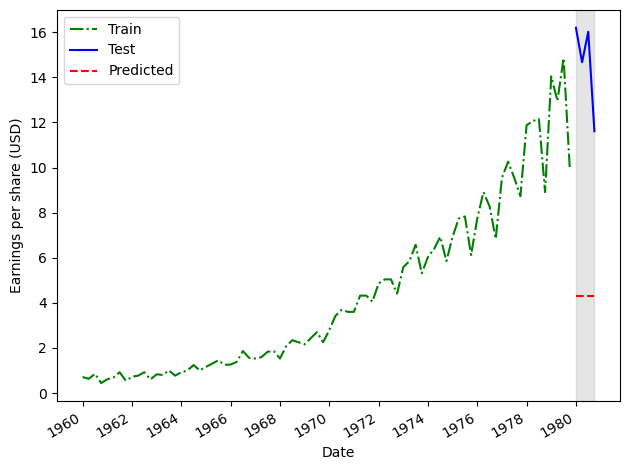

In [12]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share [USD]')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## 2. baseline model: 
### Predict last year mean  

In [14]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [15]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,date,data,year,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,1980,4.3085,12.96
81,1980-04-01,14.67,1980,4.3085,12.96
82,1980-07-02,16.02,1980,4.3085,12.96
83,1980-10-01,11.61,1980,4.3085,12.96


In [16]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

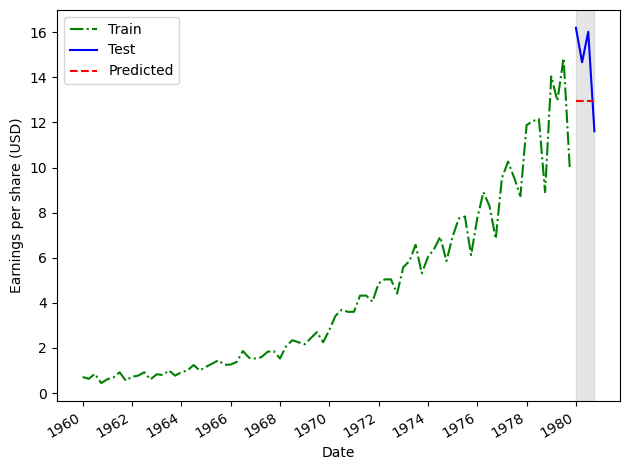

In [17]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share [USD]')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## 3. baseline model: 
### Predict last know value   

In [18]:
last = train['data'].iloc[-1]
last

9.99

In [19]:
test.loc[:, 'pred_last'] = last

test

,date,data,year,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,1980,4.3085,12.96,9.99
81,1980-04-01,14.67,1980,4.3085,12.96,9.99
82,1980-07-02,16.02,1980,4.3085,12.96,9.99
83,1980-10-01,11.61,1980,4.3085,12.96,9.99


In [20]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

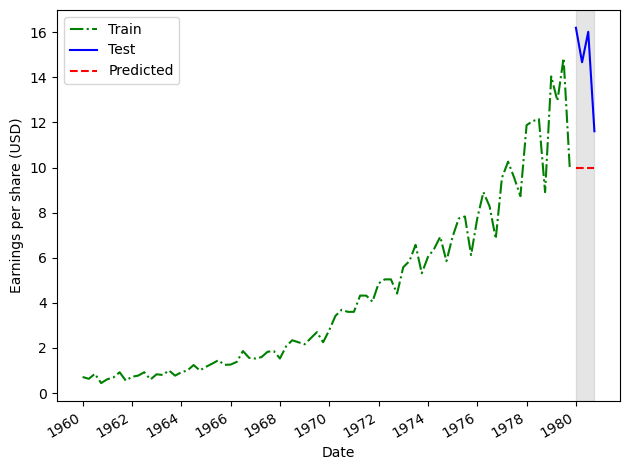

In [21]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share [USD]')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## 4. baseline model: 
### Naive seasonal forecast    

In [23]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

test

,date,data,year,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,1980,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,1980,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,1980,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,1980,4.3085,12.96,9.99,9.99


In [24]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

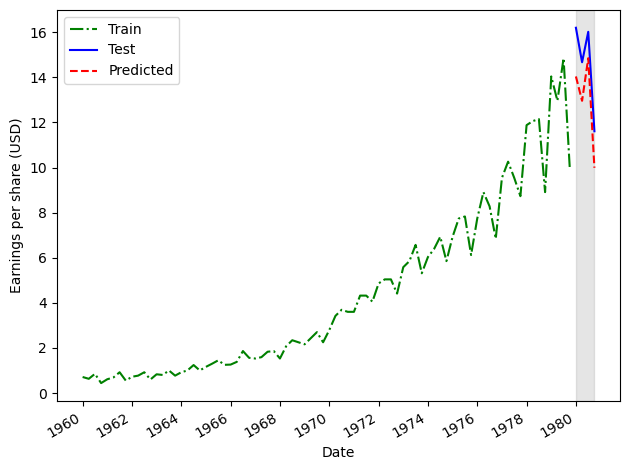

In [26]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share [USD]')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Compare all baseline models to each other
### Visualize the results of all 4 baseline models based on the MAPE metric 

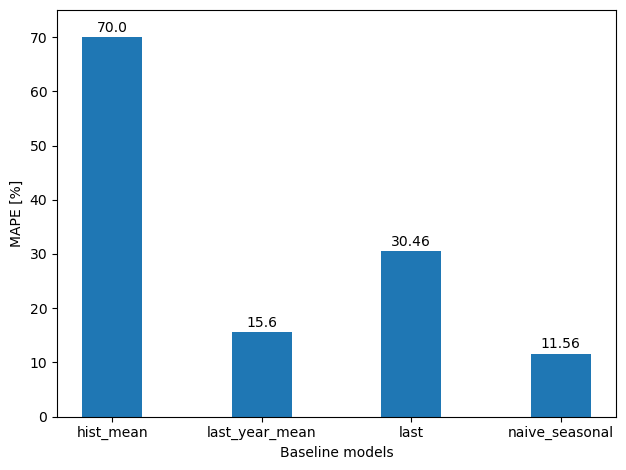

In [32]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline models')
ax.set_ylabel('MAPE [%]')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()